In [1]:
!wget https://www.dropbox.com/s/jtsfphcmwtlqaof/Final%20covid_normal.zip?dl=0

--2020-11-17 19:34:44--  https://www.dropbox.com/s/jtsfphcmwtlqaof/Final%20covid_normal.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/jtsfphcmwtlqaof/Final%20covid_normal.zip [following]
--2020-11-17 19:34:44--  https://www.dropbox.com/s/raw/jtsfphcmwtlqaof/Final%20covid_normal.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucabbf6f8be40130623ba92072a9.dl.dropboxusercontent.com/cd/0/inline/BDaH1MrJJTxfggLKnIQOdfB7dFXMg01IQP8Am3ucfcY0CnnBl1YSJ5JEZLABQJpT-q_wuVdK7wi8I0V5wfX10jY2fDvDPRPKYokdORPl0z74ZxBTIoPSv8hRAJeP-TyU8Gs/file# [following]
--2020-11-17 19:34:44--  https://ucabbf6f8be40130623ba92072a9.dl.dropboxusercontent.com/cd/0/inline/BDaH1MrJJTxfggLKnIQOdfB7dFXMg01IQP8Am3ucfcY0CnnBl1YSJ5JEZLABQJpT-q_wuVdK7

In [2]:
!unzip 'Final covid_normal.zip?dl=0'

Archive:  Final covid_normal.zip?dl=0
   creating: Final covid_normal/COVID/
  inflating: Final covid_normal/COVID/00870a9c.jpg  
  inflating: Final covid_normal/COVID/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: Final covid_normal/COVID/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: Final covid_normal/COVID/071d06607edf81d70c940e043bce34_jumbo.jpeg  
  inflating: Final covid_normal/COVID/078d2e0b3e4fec1d603efb0e818c31_jumbo.jpeg  
  inflating: Final covid_normal/COVID/08d780ae.jpg  
  inflating: Final covid_normal/COVID/08ed451c576ee00935ee178ec85c57_jumbo-1.jpeg  
  inflating: Final covid_normal/COVID/0a6c60063b4bae4de001caaba306d1_jumbo.jpeg  
  inflating: Final covid_normal/COVID/0a7faa2a.jpg  
  inflating: Final covid_normal/COVID/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a.png  
  inflating: Final covid_normal/COVID/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1b.png  
  inflating: Final covid_normal/COVID/1.CXRCTThoraximagesofCOVID-19f

In [3]:
import glob
import numpy as np
from keras.preprocessing.image import load_img,img_to_array
import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [4]:
img_size = (224,224)
dir_name = 'Final covid_normal/COVID/'
img_list = glob.glob(dir_name + '/*')

list_covid = []
for img in img_list:
    temp_img = load_img(img,grayscale=True,target_size=(img_size))
    temp_img_array = img_to_array(temp_img) /255
    list_covid.append(temp_img_array)
list_covid = np.array(list_covid)
list_covid2 = list_covid.reshape(-1,50176)
df_covid=pd.DataFrame(list_covid2)
df_covid['label'] = np.full(df_covid.shape[0],2)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [5]:
img_size = (224,224)
dir_name2 = 'Final covid_normal/NORMAL/'
img_list2 = glob.glob(dir_name2 + '/*')

list_normal = []
for img in img_list2:
    temp_img = load_img(img,grayscale=True,target_size=(img_size))
    temp_img_array = img_to_array(temp_img) /255
    list_normal.append(temp_img_array)
list_normal = np.array(list_normal)
list_normal2 = list_normal.reshape(-1,50176)
df_normal=pd.DataFrame(list_normal2)
df_normal['label'] = np.full(df_normal.shape[0],0)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [7]:
Df = pd.concat([df_covid, df_normal], ignore_index=True)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(Df.iloc[:,0:-1], Df.iloc[:,-1], test_size=0.20, random_state=0)
x_test, x_val, y_test, y_val = train_test_split(Df.iloc[:,0:-1], Df.iloc[:,-1], test_size=0.20, random_state=0)
X_train = x_train.values.reshape(-1,224,224,1)
X_test = x_test.values.reshape(-1,224,224,1)
X_Val = x_val.values.reshape(-1,224,224,1)
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_val=to_categorical(y_val)

In [9]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D, Flatten,MaxPooling2D
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [10]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

In [11]:
#Model Defining
model=Sequential()
model.add(BatchNormalization(input_shape=(224,224,1)))
model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                padding='same'))  
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(128,kernel_size=(3,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(512,kernel_size=(3,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 224, 224, 1)       4         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0

In [12]:
import keras as keras
METRICS=[
    keras.metrics.Precision(), 
    keras.metrics.Recall(),
    'accuracy',
    keras.metrics.SensitivityAtSpecificity(0.9),
    keras.metrics.SpecificityAtSensitivity(0.9),
]
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=METRICS
)

In [13]:
history = model.fit(X_train, Y_train, 
          validation_data=(X_test,Y_test),
          epochs=15, batch_size=32, shuffle=True, 
          callbacks=[model_chkpt ,early_stopping]
         )

Epoch 1/15
46/46 [==============================] - 5s 101ms/step - loss: 0.8615 - precision: 0.6911 - recall: 0.5786 - accuracy: 0.6535 - sensitivity_at_specificity: 0.5160 - specificity_at_sensitivity: 0.4452 - val_loss: 1.2760 - val_precision: 0.2662 - val_recall: 0.2662 - val_accuracy: 0.2662 - val_sensitivity_at_specificity: 0.2505 - val_specificity_at_sensitivity: 0.6035
Epoch 2/15
46/46 [==============================] - 4s 81ms/step - loss: 0.2264 - precision: 0.9464 - recall: 0.9142 - accuracy: 0.9306 - sensitivity_at_specificity: 0.9769 - specificity_at_sensitivity: 0.9796 - val_loss: 1.4573 - val_precision: 0.2665 - val_recall: 0.2662 - val_accuracy: 0.2662 - val_sensitivity_at_specificity: 0.2600 - val_specificity_at_sensitivity: 0.6110
Epoch 3/15
46/46 [==============================] - 4s 82ms/step - loss: 0.1225 - precision: 0.9719 - recall: 0.9646 - accuracy: 0.9687 - sensitivity_at_specificity: 0.9939 - specificity_at_sensitivity: 0.9925 - val_loss: 0.3562 - val_precis

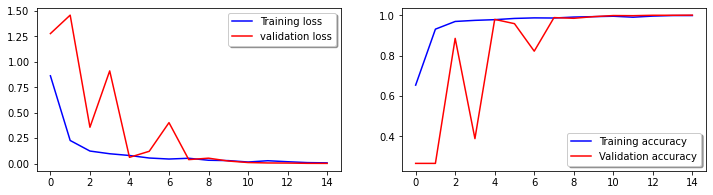

In [14]:
fig, ax = plt.subplots(1,2, figsize=(12, 3))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

<function matplotlib.pyplot.show>

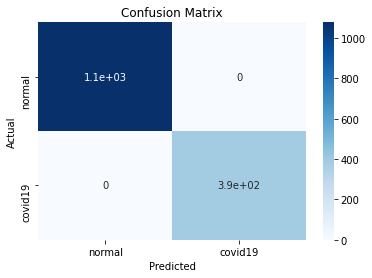

In [17]:
plt.figure()

ax = plt.subplot()

ax.set_title('Confusion Matrix')
pred = model.predict_classes(X_test)
Y_TEST = np.argmax(Y_test, axis =1)
cm = metrics.confusion_matrix(Y_TEST,pred)
classes=['normal','covid19']
sns.heatmap(cm, annot=True,xticklabels=classes, yticklabels=classes,cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show

In [18]:
from sklearn.metrics import classification_report
print(classification_report(Y_TEST, pred))
print('normal = 0 , covid19 = 1')


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1078
           2       1.00      1.00      1.00       391

    accuracy                           1.00      1469
   macro avg       1.00      1.00      1.00      1469
weighted avg       1.00      1.00      1.00      1469

normal = 0 , covid19 = 1


In [19]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_TEST, pred))
print('normal = 0 ,covid19 = 1')

[[1078    0]
 [   0  391]]
normal = 0 ,covid19 = 1


<function matplotlib.pyplot.show>

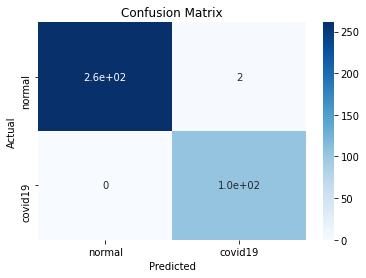

In [21]:
plt.figure()

ax = plt.subplot()

ax.set_title('Confusion Matrix')
pred = model.predict_classes(X_Val)
Y_VAL = np.argmax(Y_val, axis =1)
cm = metrics.confusion_matrix(Y_VAL,pred)
classes=['normal','covid19']
sns.heatmap(cm, annot=True,xticklabels=classes, yticklabels=classes,cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show

In [22]:
from sklearn.metrics import classification_report
print(classification_report(Y_VAL, pred))
print('normal = 0 , covid19 = 1')


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       263
           2       0.98      1.00      0.99       105

    accuracy                           0.99       368
   macro avg       0.99      1.00      0.99       368
weighted avg       0.99      0.99      0.99       368

normal = 0 , covid19 = 1


In [23]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_VAL, pred))
print('normal = 0 ,covid19 = 1')

[[261   2]
 [  0 105]]
normal = 0 ,covid19 = 1
